# Intrduction

It is desired that classify whether a patient is breast cancer or not. For that, models must be created and use the models on the data given. The models is made of three different methods which are Support Vector Machine, Random Forest and Neural Network. To compare the models, Learning Curves is used. Learning Curves gives information about the variance and the bias of the models.

In [14]:
import pandas as pd

In [15]:
dataFrame = pd.read_csv("Dataset\\breast-cancer-wisconsin.data",header=None)

In [16]:
dataFrame.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Eliminating the samples that have missing features.

In [17]:
import numpy as np
dataFrame.replace({6: {'?': np.nan}}, regex=False,inplace=True)
dataFrame = dataFrame.dropna()

In [18]:
Predictors = dataFrame.iloc[:,1:len(dataFrame.columns)-1]
Predictors.head()

,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [19]:
Classes = dataFrame.iloc[:,10].map({4 : 1, 2 : 0})
Classes.head()

0    0
1    0
2    0
3    0
4    0
Name: 10, dtype: int64

In [20]:
from sklearn import preprocessing # Normalize Data
names = Predictors.columns
scaler = preprocessing.StandardScaler()
Predictors_norm = scaler.fit_transform(Predictors)
Predictors_norm = pd.DataFrame(Predictors_norm, columns=names)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
Predictors_norm.head()

,1,2,3,4,5,6,7,8,9
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [22]:
from sklearn.model_selection import train_test_split # Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(Predictors_norm, Classes, test_size = 0.33, random_state = 42)

## Support Vector Machine Classifier (SVM)

In [23]:
from sklearn.model_selection import GridSearchCV # Grid Search
from sklearn import svm # SVM Classifier
def SVM_Optimization(SVM_Predictors, SVM_Classes, num_of_folds):
    # SVM_Predictors: Feature matrix of the data
    # SVM_Classes   : Class (Label / Target) vector of the data
    # num_of_folds  : fold number for k fold - Cross Validation
    
    # Smaller tolerance = large margin, Larger tolerance = Small margin
    tolerances = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 3, 5, 10]
    
    # Gamma is kind of variance. If Gamma is too large, it is more like overfitting
    Gammas = [0.001, 0.01, 0.05, 0.1, 0.5, 1]
    parameters_of_gridsearch = {'C' : tolerances, 'gamma' : Gammas, 'kernel' :
        ['linear', 'poly', 'rbf']}
    
    grid_search_optimization = GridSearchCV(svm.SVC(),
                                            parameters_of_gridsearch, 
                                            cv = num_of_folds, iid = False)
    grid_search_optimization.fit(SVM_Predictors, SVM_Classes)
    return grid_search_optimization.best_params_

In [24]:
optimized_param = SVM_Optimization(X_train, y_train,10)

In [25]:
svm_model = svm.SVC(C = optimized_param['C'], gamma = optimized_param['gamma'],
                    kernel = optimized_param['kernel'])

svm_model.fit(X_train, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
from sklearn.metrics import accuracy_score # Accuracy
from sklearn.model_selection import cross_val_score # K-Fold Cross Validation
from sklearn.model_selection import KFold # K-Fold Cross Validation

svm_predictions = svm_model.predict(X_test)

kfold = KFold(n_splits=10,random_state=7, shuffle=True)
scores = cross_val_score(svm_model, X_train, y_train, scoring='accuracy' ,cv=kfold).mean()

svm_train_acc = scores
print("SVM training Accuracy of the mean of 10 - Fold Cross Validation is ", svm_train_acc)

svm_test_acc = accuracy_score(y_test, svm_predictions)
print("SVM test Accuracy is ", svm_test_acc)

SVM training Accuracy of the mean of 10 - Fold Cross Validation is  0.9782608695652174
SVM test Accuracy is  0.9646017699115044


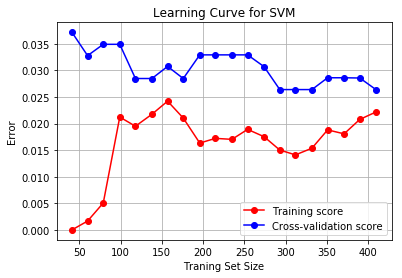

In [29]:
# Plot the learning curve of SVM
from sklearn.model_selection import learning_curve # Learning Curve
import matplotlib.pyplot as plt # Plot Learning curve

train_size = np.linspace(0.1, 1.0, 20)
plt.figure()
plt.title("Learning Curve for SVM")
plt.xlabel("Traning Set Size")
plt.ylabel("Error")
train_sizes, train_scores, test_scores = learning_curve(
        svm_model, X_train, y_train, cv=10, train_sizes=train_size, 
        scoring = 'neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

plt.legend(loc="best")

## Random Forest (RF)

In [30]:
from sklearn.model_selection import GridSearchCV # Grid Search
from sklearn.ensemble import RandomForestClassifier # RF Classifier
# Random Forest Optimization
def RF_Optimization(RF_Predictors, RF_Classes, num_of_folds):
    # RF_Predictors: Feature matrix of the data
    # RF_Classes   : Class (Label / Target) vector of the data
    # num_of_folds : fold number for k fold - Cross Validation
    
    # Number of trees
    num_tree = [int (x) for x in np.linspace(10, 100, 10)]
    
    # Method for RF
    bootstrap = [True, False]
   
    parameters_of_gridsearch = {'n_estimators' : num_tree,
                                'bootstrap' : bootstrap,
                                'criterion' : ['gini', 'entropy']}
    
    kfold = KFold(n_splits=num_of_folds,random_state=7, shuffle=True)
    
    # GridSearch with k-fold Cross Validation
    grid_search_optimization = GridSearchCV(estimator = RandomForestClassifier(),
                                            param_grid = parameters_of_gridsearch, 
                                            cv = kfold, iid = False)
    grid_search_optimization.fit(RF_Predictors, RF_Classes)
    
    return grid_search_optimization.best_params_

In [31]:
# Random Forest Classification
from sklearn.metrics import accuracy_score # Accuracy
from sklearn.model_selection import cross_val_score # K-Fold Cross Validation
from sklearn.model_selection import KFold # K-Fold Cross Validation

optimized_param_rf = RF_Optimization(X_train, y_train,10)

rf_model = RandomForestClassifier(n_estimators = optimized_param_rf['n_estimators'],
                                  bootstrap = optimized_param_rf['bootstrap'],
                                  criterion = optimized_param_rf['criterion'],
                                  random_state = 42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

kfold = KFold(n_splits=10,random_state=7, shuffle=True)
scores = cross_val_score(rf_model, X_train, y_train, scoring='accuracy' ,cv=kfold).mean()

rf_train_acc = scores
print("RF training Accuracy of the mean of 10 - Fold Cross Validation is ", rf_train_acc)

rf_test_acc = accuracy_score(y_test, rf_predictions)
print("RF test Accuracy is ", rf_test_acc)

RF training Accuracy of the mean of 10 - Fold Cross Validation is  0.9673429951690821
RF test Accuracy is  0.9513274336283186


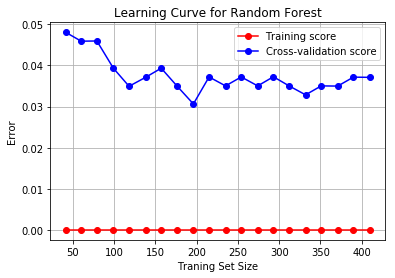

In [32]:
# Plot the learning curve of Random Forest
from sklearn.model_selection import learning_curve # Learning Curve
import matplotlib.pyplot as plt # Plot Learning curve

train_size = np.linspace(0.1, 1.0, 20)
plt.figure()
plt.title("Learning Curve for Random Forest")
plt.xlabel("Traning Set Size")
plt.ylabel("Error")
train_sizes, train_scores, test_scores = learning_curve(
        rf_model, X_train, y_train, cv=10, train_sizes=train_size, 
        scoring = 'neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

plt.legend(loc="best")

## Neural Network (NN)

In [33]:
# Neural Network GridSearch Optimization
from sklearn.model_selection import GridSearchCV # Grid Search
from sklearn.neural_network import MLPClassifier # Neural Network Classifier

def NN_Optimization(NN_Predictors, NN_Classes, num_of_folds):
    # NN_Predictors: Feature matrix of the data
    # NN_Classes   : Class (Label / Target) vector of the data
    # num_of_folds : fold number for k fold - Cross Validation
    
    # Solver
    solver = ['lbfgs', 'adam']
    
    # Activation function for the hidden layer
    activation = ['logistic', 'tanh', 'relu']
    
    # Hidden Layer size
    hidden_layer_sizes = [(5,), (8,), (15,), (100,)]
    
    # Alpha, L2 penalty regularization parameter
    alpha = 10.0 ** -np.arange(1, 5)
    
    # Maximum iteration
    max_iter = [1200, 1500]
    
    # Random State
    random_state = [0, 1, 2, 5, 10, 42]
   
    parameters_of_gridsearch = {'solver' : solver,
                                'activation' : activation,
                                'hidden_layer_sizes' : hidden_layer_sizes,
                                'max_iter' : max_iter,
                                'alpha' : alpha,
                                'random_state' : random_state,
                                'early_stopping' : [True]}
    
    kfold = KFold(n_splits=num_of_folds,random_state=7, shuffle=True)

    # GridSearch with k-fold Cross Validation
    grid_search_optimization = GridSearchCV(estimator = MLPClassifier(),
                                            param_grid = parameters_of_gridsearch, 
                                            cv = kfold,
                                            iid = False)
    
    grid_search_optimization.fit(NN_Predictors, NN_Classes)
    
    return grid_search_optimization.best_params_

In [34]:
# Neural Network Classification
optimized_param_nn = NN_Optimization(X_train, y_train,10)

nn_model = MLPClassifier(solver = optimized_param_nn['solver'],
                         activation = optimized_param_nn['activation'],
                         hidden_layer_sizes = optimized_param_nn['hidden_layer_sizes'],
                         max_iter = optimized_param_nn['max_iter'],
                         alpha = optimized_param_nn['alpha'],
                         random_state = optimized_param_nn['random_state'],
                         early_stopping = True)

nn_model.fit(X_train, y_train)

nn_predictions = nn_model.predict(X_test)

kfold = KFold(n_splits=10,random_state=7, shuffle=True)
scores = cross_val_score(nn_model, X_train, y_train, scoring='accuracy' ,cv=kfold).mean()

nn_train_acc = scores
print("NN training Accuracy of the mean of 10 - Fold Cross Validation is ", nn_train_acc)

nn_test_acc = accuracy_score(y_test, nn_predictions)
print("NN test Accuracy is ", nn_test_acc)

NN training Accuracy of the mean of 10 - Fold Cross Validation is  0.9716908212560387
NN test Accuracy is  0.9601769911504425


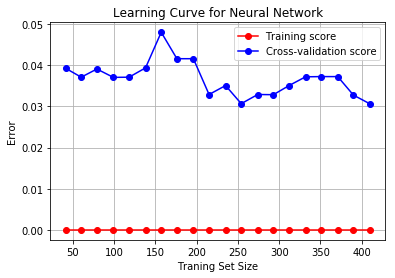

In [35]:
# Plot the learning curve of Neural Network
from sklearn.model_selection import learning_curve # Learning Curve
import matplotlib.pyplot as plt # Plot Learning curve
train_size = np.linspace(0.1, 1.0, 20)
plt.figure()
plt.title("Learning Curve for Neural Network")
plt.xlabel("Traning Set Size")
plt.ylabel("Error")
train_sizes, train_scores, test_scores = learning_curve(
        nn_model, X_train, y_train, cv=10, train_sizes=train_size, 
        scoring = 'neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

plt.legend(loc="best")

## Conclusion

The learning curves gives the information about the variance and the bias of the models. If Cross-Validation curve is near the x-axis, which means the error is too small, then bias is low. If the gap between Cross-Validation curve and the training error curve is small, then variance is low. To sum up, the gap between the cross-validation curve and the training error curve gives information about the variance of the model. If it is small, then variance is low. If it is large, then variance is high. On the other hand, the gap between the cross validation error curve and the x-axis of the figure gives information about the bias of the model. If it is small, then the bias is low. If it is large, then the bias is large. So that, the learning curve for SVM model has the smallest variance than the others and the learning curve for Random Forest and Neural Network has the smallest bias than SVM. The variances of Random Forest and Neural Network are too close with each other, but Neural Network seems to be a little bit small.